In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Explore and Understand Data

In [3]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,6901257,6304928,7919400,13418779,3808709,12422935,11825529,13971273,180792,5385260
log_price,5.01064,5.1299,4.97673,6.62007,4.74493,4.44265,4.41884,4.78749,4.78749,3.58352
property_type,Apartment,Apartment,Apartment,House,Apartment,Apartment,Apartment,Condominium,House,House
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room,Private room
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche...","{TV,""Cable TV"",""Wireless Internet"",""Air condit...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,Internet,""Wireless Internet"",""Air conditio...","{TV,""Wireless Internet"",Heating,""Smoke detecto...","{TV,Internet,""Wireless Internet"",""Air conditio...","{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...","{TV,""Cable TV"",""Wireless Internet"",""Pets live ...","{""Wireless Internet"",""Air conditioning"",Kitche..."
accommodates,3,7,5,4,2,2,3,2,2,2
bathrooms,1,1,1,1,1,1,1,1,1,1
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,strict,strict,moderate,flexible,moderate,strict,moderate,moderate,moderate,moderate
cleaning_fee,True,True,True,True,True,True,True,True,True,True


In [4]:
test.head(1)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,3895911,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,Real Bed,flexible,True,LA,...,34.028372,-118.494449,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,6,97.0,https://a0.muscache.com/im/pictures/92355eae-b...,90403,1.0,1.0


In [5]:
# column names
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
# null value count for each column
train.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
# unique values in each column
train.apply(pd.Series.nunique)

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [8]:
# overview of data ranges, min, max, mean, etc.
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [9]:
# data types of each column
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [10]:
#features with too many unique variables / provides low value and should be dropped
# id, amenities, description, first_review, name, thumbnail_url
train_processed = train.drop(['id', 'amenities', 'description', 'first_review', 'name', 'thumbnail_url'], axis=1)


In [11]:
train_processed.dtypes

log_price                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

# Clean and Transform Data for Tree Models

In [12]:
# deal with NA, methods differ according to content

train_processed['host_since'] = train_processed['host_since'].fillna(0)
train_processed['last_review'] = train_processed['last_review'].fillna(0)

train_processed['host_since'] = pd.to_datetime(train_processed['host_since'])
train_processed['last_review'] = pd.to_datetime(train_processed['last_review'])

In [13]:
# deal with NA, methods differ according to content
train_processed['bathrooms'] = train_processed['bathrooms'].fillna(train_processed['bathrooms'].mean())
train_processed['host_has_profile_pic'] = train_processed['host_has_profile_pic'].fillna('NA')
train_processed['host_identity_verified'] = train_processed['host_identity_verified'].fillna('NA')
train_processed['neighbourhood'] = train_processed['neighbourhood'].fillna('NA')

train_processed['review_scores_rating'] = train_processed['review_scores_rating'].fillna(train_processed['review_scores_rating'].mean())

# host response rate has percentages in text form, need to convert
train_processed['host_response_rate'] = train_processed['host_response_rate'].str.rstrip('%').astype('float') / 100.0
train_processed['host_response_rate'] = train_processed['host_response_rate'].fillna(train_processed['host_response_rate'].mean())


train_processed['host_since'] = train_processed['host_since'].fillna(0)
train_processed['last_review'] = train_processed['last_review'].fillna(0)
train_processed['zipcode'] = train_processed['zipcode'].fillna('NA')

train_processed['bedrooms'] = train_processed['bedrooms'].fillna(train_processed['bedrooms'].mean())
train_processed['beds'] = train_processed['beds'].fillna(train_processed['beds'].mean())

train_processed.isnull().sum()


log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [14]:
train_processed.dtypes

log_price                        float64
property_type                     object
room_type                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
host_has_profile_pic              object
host_identity_verified            object
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
zipcode                           object
bedrooms                         float64
beds                             float64
dtype: object

In [15]:
from datetime import datetime 
set_date = datetime(2019, 3, 10)

train_processed['host_since'] = (set_date - train_processed['host_since']).apply(lambda x: x.days)
train_processed['last_review'] = (set_date - train_processed['last_review']).apply(lambda x: x.days)
train_processed.dtypes

log_price                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                  int64
instant_bookable           object
last_review                 int64
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [16]:
# user label encoding for categorical variables
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
def transformCategoricalColumn(df, col_name):
#     le.fit(df[col_name].unique())
    df[col_name] = le.fit_transform(df[col_name])
    
categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 
'city', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'instant_bookable', 'zipcode' ]


df_X_after_label_encoding = train_processed.drop(['log_price'], axis=1)
df_y_after_label_encoding = train_processed.loc[:, 'log_price']

for col in categories:
    transformCategoricalColumn(df_X_after_label_encoding, col)
df_X_after_label_encoding.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,0,0,3,1.0,4,2,True,4,2,2,...,0,965,40.696524,-73.991617,77,2,100.000000,195,1.0,1.0
1,0,0,7,1.0,4,2,True,4,2,1,...,1,533,40.766115,-73.989040,252,6,93.000000,74,3.0,3.0
2,0,0,5,1.0,4,1,True,4,2,2,...,1,542,40.808110,-73.943756,247,10,92.000000,84,1.0,3.0
3,17,0,4,1.0,4,0,True,5,2,2,...,0,17965,37.772004,-122.431619,325,0,94.067365,748,2.0,2.0
4,0,0,2,1.0,4,1,True,2,2,2,...,1,777,38.925627,-77.034596,119,4,40.000000,341,0.0,1.0


# Tree Models

In [17]:
# random forest model, base model

### default setting seems to overfit becuase test error is significantly higher than train error

from sklearn.ensemble import GradientBoostingRegressor

def get_model_error(model, X, y, test_size):
    trainX, testX, trainY, testY = train_test_split(X, y, test_size = test_size)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    predX = model.predict(trainX)
    print(np.sqrt(mean_squared_error(trainY, predX)),
    np.sqrt(mean_squared_error(testY, pred)))
    return np.sqrt(mean_squared_error(trainY, predX)), np.sqrt(mean_squared_error(testY, pred))

model_rf = RandomForestRegressor(n_jobs = -1, n_estimators = 50)

print('random forest model- base model--> train error, test error')
get_model_error(model_rf, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

random forest model- base model--> train error, test error
0.15006808427849122 0.3985302735180628


(0.15006808427849122, 0.3985302735180628)

Feature ranking:
1. feature 1 (0.374983)
2. feature 3 (0.120672)
3. feature 15 (0.094417)
4. feature 14 (0.072358)
5. feature 19 (0.062915)
6. feature 11 (0.044826)
7. feature 13 (0.038997)
8. feature 2 (0.035237)
9. feature 16 (0.026074)
10. feature 20 (0.022500)
11. feature 17 (0.018644)
12. feature 18 (0.016739)
13. feature 10 (0.015125)
14. feature 0 (0.012550)
15. feature 7 (0.008515)
16. feature 5 (0.008346)
17. feature 21 (0.008200)
18. feature 6 (0.005944)
19. feature 12 (0.004973)
20. feature 9 (0.004686)
21. feature 4 (0.002562)
22. feature 8 (0.000737)


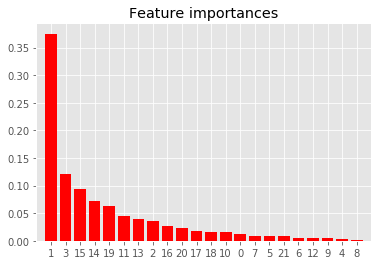

In [18]:
## tune the model to resolve overfit
# rank features by feature importance, select features that are significant in the model and re-train
# random forest model, feature importance

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(df_X_after_label_encoding.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X_after_label_encoding.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(df_X_after_label_encoding.shape[1]), indices)
plt.xlim([-1, df_X_after_label_encoding.shape[1]])
plt.show()

In [19]:
# fewer features doesn't impact the error metric by much
# need to find a different way to reduce overfit

print('random forest model - with top tanked 10 features base on feature importance--> train error, test error')
get_model_error(model_rf, df_X_after_label_encoding.iloc[:, indices[:10]], df_y_after_label_encoding, 0.3)


random forest model - with top tanked 10 features base on feature importance--> train error, test error
0.15290504377218123 0.4095617719166682


(0.15290504377218123, 0.4095617719166682)

In [20]:
## solving the overfitting problem, try make the tree smaller
# now train and test error are both around 0.46

model_rf1 = RandomForestRegressor(n_jobs = -1, n_estimators = 20, max_depth=5)
get_model_error(model_rf1, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

0.46168542257471523 0.46437330977451413


(0.46168542257471523, 0.46437330977451413)

In [21]:
# gradient boosting model, no overfitting, performance is slightly better than random forest

model_gb = GradientBoostingRegressor(n_estimators = 50)
print('gradient boosting model- base model--> train error, test error')
get_model_error(model_gb, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

gradient boosting model- base model--> train error, test error
0.42660385494668535 0.4280179785240087


(0.42660385494668535, 0.4280179785240087)

# Clean and Transform Data for Linear Models

In [22]:
df_X_after_oneHot_encoding = train_processed.drop(['log_price'], axis=1)
df_y_after_oneHot_encoding = train_processed.loc[:, 'log_price']

In [23]:
# one-hot encoding for categorical varuables
# property_type, property_type, room_type, bed_type, cancellation_policy, 
# city, host_has_profile_pic, host_identity_verified, neighbourhood, 

#change categorical data into dummy variables, need to define a function so that 
#when new data comes into the pipeline, it can handle
def make_dummies(test_col, train_unique_vals, col_name):
    """
    Return a df containing len(train_unique_vals) columns for 
    each unique value in train_unique_vals. If the test_col has more 
    unique values that are not seen in train_unique_vals, value
    will be 0
    """
    dummies = {}
    for val in train_unique_vals:
        dummies[col_name + '_' + val] = (test_col == val).astype(int)
    return pd.DataFrame(dummies, index = test_col.index)

categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 
'city', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'instant_bookable', 'zipcode' ]

for category in categories:
    temp_df = make_dummies(df_X_after_oneHot_encoding[category], df_X_after_oneHot_encoding[category].unique(), category)
    temp_df = temp_df.iloc[:, :-1]     #drop last column to prevent co0linearity problem
    data_transformed = pd.concat([df_X_after_oneHot_encoding, temp_df], axis = 1)
    train_processed = df_X_after_oneHot_encoding

    
df_X_after_oneHot_encoding = df_X_after_oneHot_encoding.drop(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'instant_bookable', 'zipcode' ], axis=1)    
df_X_after_oneHot_encoding.head()

,accommodates,bathrooms,cleaning_fee,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,3,1.0,True,0.94352,2540,965,40.696524,-73.991617,2,100.000000,1.0,1.0
1,7,1.0,True,1.00000,629,533,40.766115,-73.989040,6,93.000000,3.0,3.0
2,5,1.0,True,1.00000,866,542,40.808110,-73.943756,10,92.000000,1.0,3.0
3,4,1.0,True,0.94352,1421,17965,37.772004,-122.431619,0,94.067365,2.0,2.0
4,2,1.0,True,1.00000,1470,777,38.925627,-77.034596,4,40.000000,0.0,1.0


# Linear Models

In [26]:
# We will use elastic net, lasso, ridge regression for linear models
# here is a good article on these 3 https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

# elastic net combine the penalties of ridge regression and lasso, trying to reduce both variance and bias

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

df_X_after_oneHot_encoding, df_y_after_oneHot_encoding = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(df_X_after_oneHot_encoding, df_y_after_oneHot_encoding)
get_model_error(regr, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

0.6336940238798002 0.628072270272334


(0.6336940238798002, 0.628072270272334)

In [27]:
# According to WIkipedia, "lasso is a regression analysis method that performs both variable 
#selection and regularization in order to enhance the prediction accuracy and interpretability of the
#statistical model it produces"

# Since we have over a thouand features, we need ML models like this to help us select the most
#impactable variables

# Lasso does have a better performance than Elastic Net

from sklearn.linear_model import Lasso

rgr_lasso = Lasso(alpha=0.001)
get_model_error(rgr_lasso, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

0.4779983606246699 0.478445992041665


(0.4779983606246699, 0.478445992041665)

In [28]:
from sklearn.linear_model import Ridge

rgr_ridge = Ridge(alpha=0.2)
get_model_error(rgr_ridge, df_X_after_label_encoding, df_y_after_label_encoding, 0.3)

0.47777928622387894 0.478173190059996


(0.47777928622387894, 0.478173190059996)

# Model Comparison and Deciding on One

In [ ]:
# of all models we tried, gradient boosting seems to have the lowest error rate, we will do a grid search to 
# further optimize the model

# ! We won't tune learning rate. The smaller the learning rate, the better the performance. The only drawback is time

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [20, 50, 100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 5],
}

gradientBoosting = GradientBoostingRegressor()
grid = GridSearchCV(gradientBoosting, parameters, cv=3)
grid.fit(df_X_after_label_encoding, df_y_after_label_encoding)

# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))